# ☀️ Solar Data Discovery – Sierraleone EDA
**Objective:**  
Perform profiling, cleaning, and exploratory analysis on Sierraleone’s solar dataset to understand data quality, detect trends, and identify insights relevant to solar energy potential.

**Key Tasks:**
- Summary statistics & missing-value report  
- Outlier detection and cleaning  
- Time-series and correlation analysis  
- Wind, temperature, and humidity analysis  
- Data-driven insights summary

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Preview first few rows
print("Dataset Overview:")
display(df.head())
df.info()

Dataset Overview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [2]:
# --- Part 1: Summary Statistics & Missing Values ---
print("\n🔍 Missing Values Report:")
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent}).sort_values(by='Missing %', ascending=False)
display(missing_df[missing_df['Missing Count'] > 0])

print("\nColumns with >5% missing values:")
display(missing_df[missing_df['Missing %'] > 5])

print("\nSummary Statistics for Numeric Columns:")
display(df.describe())


🔍 Missing Values Report:


,Missing Count,Missing %
Comments,525600,100.0



Columns with >5% missing values:


,Missing Count,Missing %
Comments,525600,100.0



Summary Statistics for Numeric Columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# --- Part 2: Outlier Detection & Basic Cleaning ---
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)
print(f"\nDetected {outlier_mask.sum()} extreme outlier rows out of {len(df)} total.")

# Option 1: Replace outliers with median
for col in key_cols:
    median_val = df[col].median()
    df.loc[z_scores[:, key_cols.index(col)] > 3, col] = median_val

# Impute remaining missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

print("\n✅ Outliers handled and missing values imputed.")


Detected 16292 extreme outlier rows out of 525600 total.

✅ Outliers handled and missing values imputed.


c:\Users\naima\venvs\scw1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


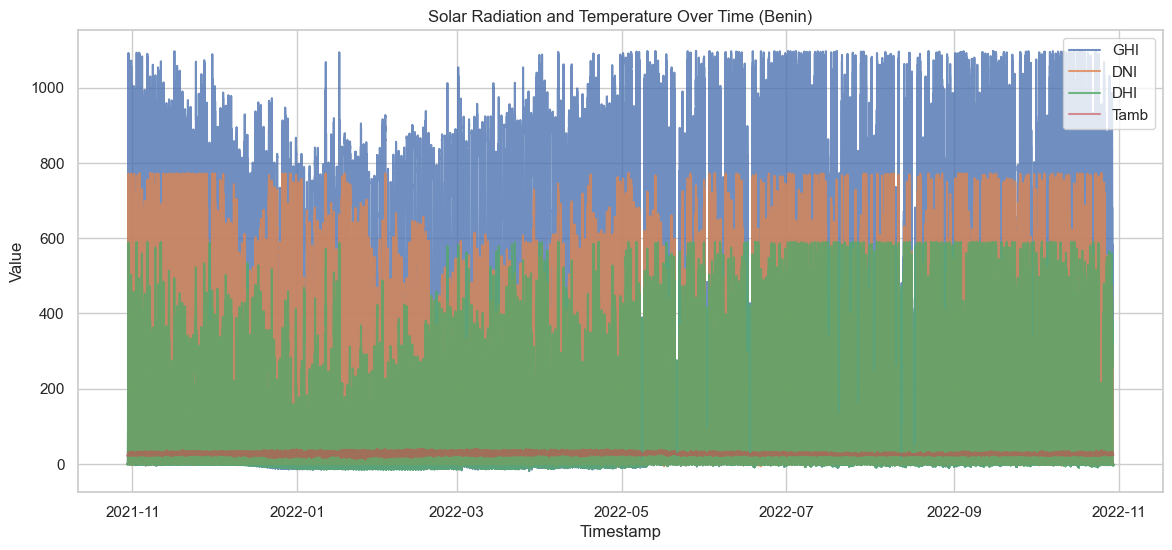

In [4]:

# --- Part 3: Time Series Analysis ---
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', alpha=0.8)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', alpha=0.8)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', alpha=0.8)
if 'Tamb' in df.columns:
    plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', alpha=0.6)
plt.legend()
plt.title('Solar Radiation and Temperature Over Time (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

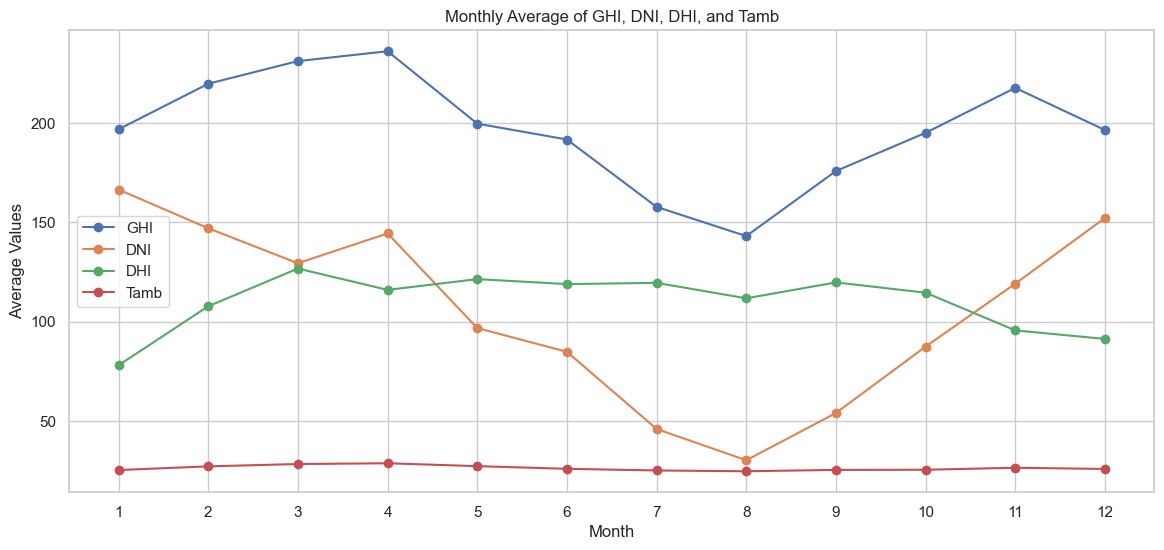

In [5]:
# Add a 'Month' column to the DataFrame (use the Timestamp column, not the RangeIndex)
df['Month'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.month

# Calculate the monthly average for each variable
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot the monthly averages
monthly_avg.plot(kind='line', figsize=(14, 6), marker='o')

# Set plot title and labels
plt.title("Monthly Average of GHI, DNI, DHI, and Tamb")
plt.xlabel("Month")
plt.ylabel("Average Values")
plt.xticks(range(1,13))  # ensure months 1-12 shown

# Display the plot
plt.show()

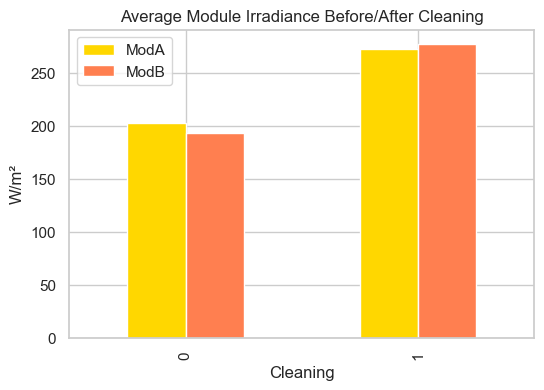

In [6]:
if 'Cleaning' in df.columns:
    avg_mod = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
    avg_mod.plot(kind='bar', figsize=(6,4), color=['#FFD700','#FF7F50'])
    plt.title("Average Module Irradiance Before/After Cleaning")
    plt.ylabel("W/m²")
    plt.show()
else:
    print("No 'Cleaning' column found — skipping this plot.")


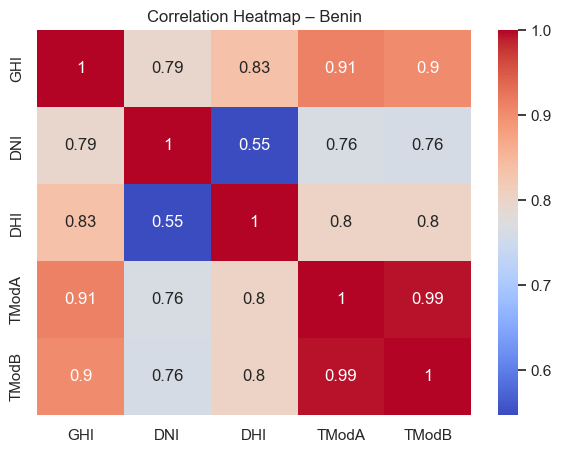

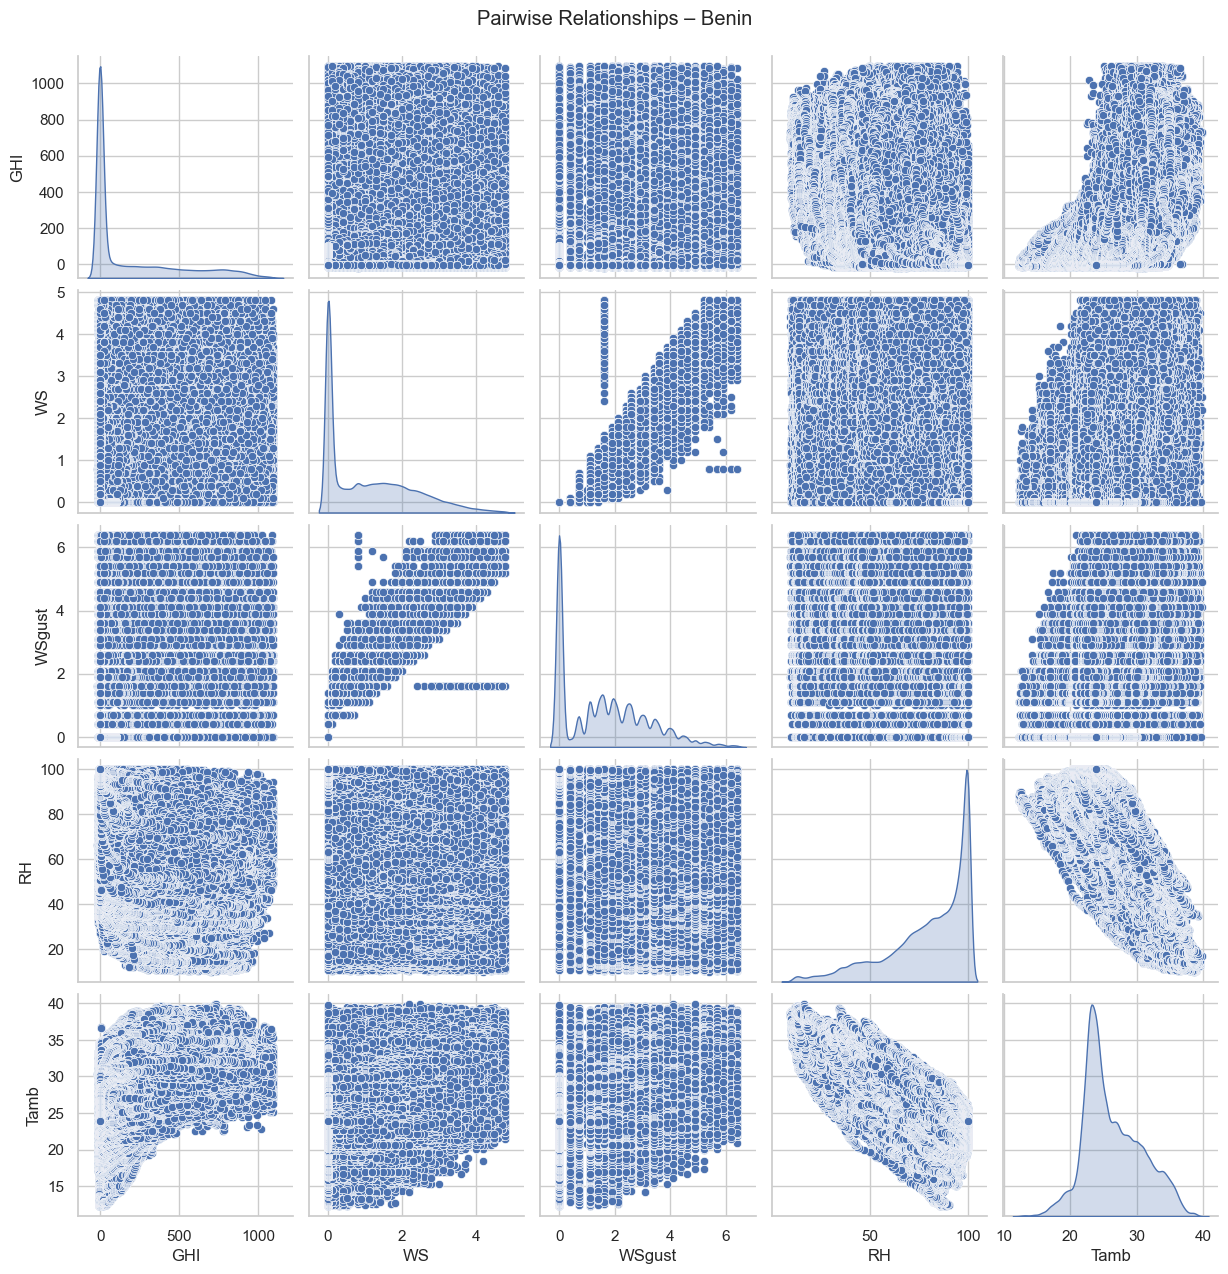

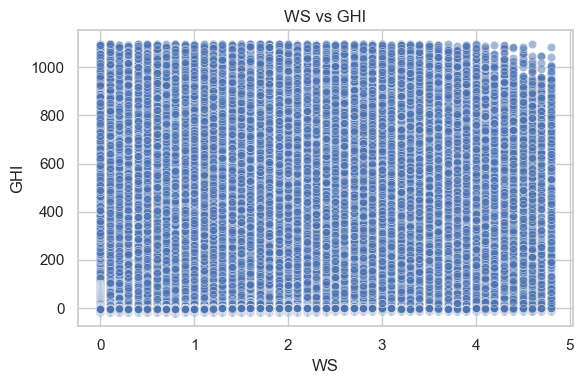

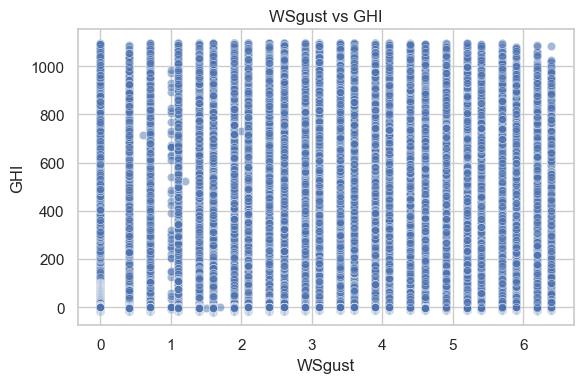

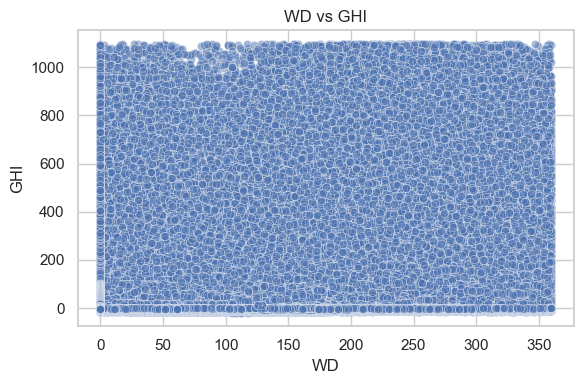

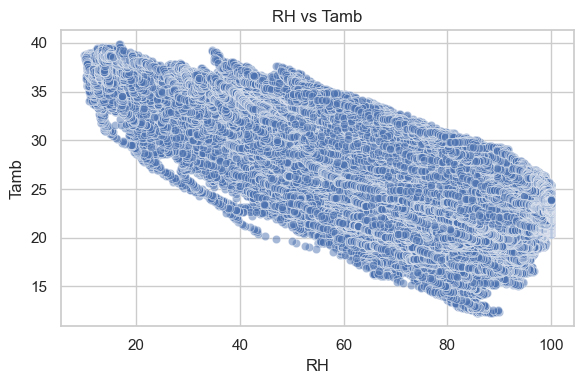

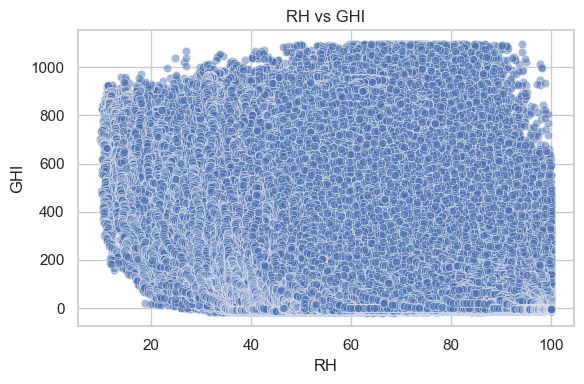

In [7]:
corr_cols = ['GHI','DNI','DHI','TModA','TModB']
plt.figure(figsize=(7,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap – Benin")
plt.show()

# Scatter relationship
sns.pairplot(df[['GHI','WS','WSgust','RH','Tamb']], diag_kind='kde')
plt.suptitle("Pairwise Relationships – Benin", y=1.02)
plt.show()
# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()


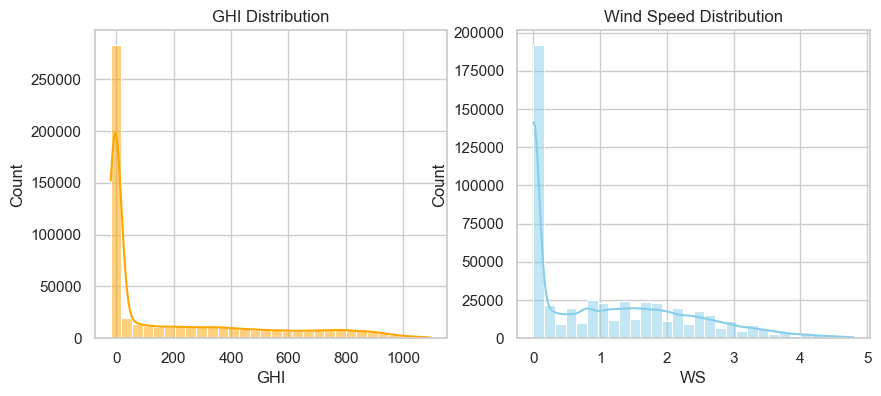

In [8]:
# --- Part 6: Wind & Distribution Analysis ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title('GHI Distribution')
plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=30, kde=True, color='skyblue')
plt.title('Wind Speed Distribution')
plt.show()


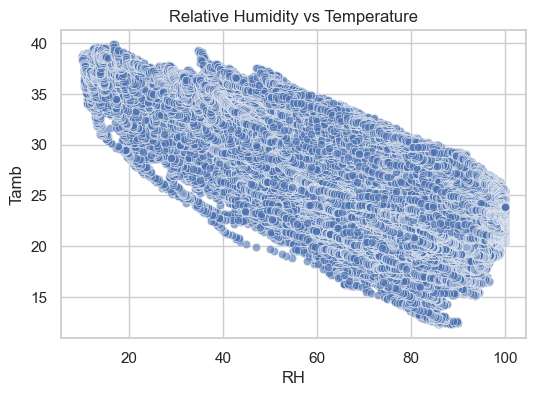

In [9]:
# --- Part 7: Temperature & Humidity Effect ---
plt.figure(figsize=(6,4))
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.6)
plt.title('Relative Humidity vs Temperature')
plt.show()

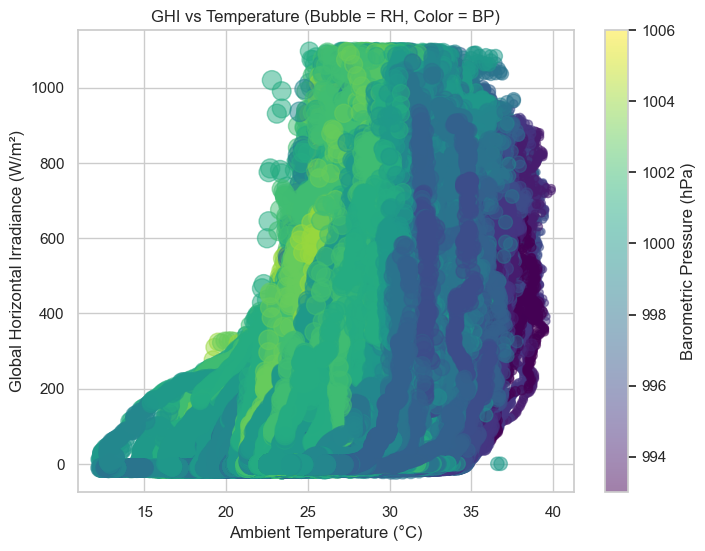

In [10]:
# --- Part 8: Bubble Chart (GHI vs Tamb) ---
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5,
            c=df['BP'] if 'BP' in df.columns else 'blue',
            cmap='viridis')
plt.title('GHI vs Temperature (Bubble = RH, Color = BP)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
if 'BP' in df.columns:
    plt.colorbar(label='Barometric Pressure (hPa)')
plt.show()


In [11]:
# --- Export Cleaned Dataset ---
df.to_csv('../data/sierraleone_clean.csv', index=False)
print("✅ Cleaned sierraleone dataset exported successfully.")

✅ Cleaned sierraleone dataset exported successfully.
